# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install -r requirements.txt

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


In [2]:
from helper import train_dqn
import pickle
import time
from os import path
import json
from unityagents import UnityEnvironment
import torch

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [ ]:
# Retrieve the experiment configurations:
with open('experiments.json') as f:
    experiments_data = json.load(f)["experiments"]

# Iterate through all the experiments:
for experiment in experiments_data:
    if experiment["skip"] == False:
        # Get experiment variables:
        experiment_name = experiment["experiment_name"]
        experiment_config = experiment["experiment_config"]
        num_of_episodes = 2000 # experiment_config["num_of_episodes"]
        max_steps = 1000 # experiment_config["max_steps"]
        
        # Main variables:
        learning_rate = experiment_config["learning_rate"]
        gamma = experiment_config["gamma"]
        epsilon_decay = experiment_config["epsilon_decay"]
        epsilon_min = experiment_config["epsilon_min"]
        tau = experiment_config["tau"]
        
        # Model variables:
        model_fc1_units = experiment_config["model_fc1_units"]
        model_fc2_units = experiment_config["model_fc2_units"]
        model_fc3_units = experiment_config["model_fc3_units"]
        model_dropout = experiment_config["model_dropout"]
        model_starting_weights = experiment_config["model_starting_weights"]
        model_batch_norm = experiment_config["model_batch_norm"]
        
        # Inform user about the experiment:
        print("\n#############################\nSTARTING NEW EXPERIMENT: {} \n#############################\n".format(experiment_name))
        print("EXPERIMENT CONFIG:\n")
        print("Number of episodes: {}".format(num_of_episodes))
        print("Max Steps: {}".format(max_steps))
        print("Learning Rate: {}".format(learning_rate))
        print("Gamma: {}".format(gamma))
        print("Epsilon Decay: {}".format(epsilon_decay))
        print("Epsilon Minimum: {}".format(epsilon_min))
        print("TAU: {}".format(tau))
        print("Model Fully Connected Layer 1 Size: {}".format(model_fc1_units))
        print("Model Fully Connected Layer 2 Size: {}".format(model_fc2_units))
        print("Model Fully Connected Layer 3 Size: {} (0 = Layer not used)".format(model_fc3_units))
        print("Model Uses a 30% Dropout Probability: {}".format(model_dropout))
        print("")

        # Train the model:
        best_score, all_scores, model_state_dict = train_dqn(env, num_of_episodes, max_steps, learning_rate, gamma, epsilon_decay, epsilon_min,
                                                   model_fc1_units, model_fc2_units, model_fc3_units, model_starting_weights, model_dropout, model_batch_norm,
                                                   tau)
        print("\nFinal Score: {}".format(best_score))

        # Save the results and final model state dictionary:
        timestamp = int(time.time())
        
        results_dict = {
            'experiment_name': experiment_name,
            'timestamp': timestamp,
            'best_score': best_score,
            'all_scores': all_scores
        }
        
        results_file_name = path.join('results', '{}_{}_results'.format(timestamp, experiment_name))
        model_file_name = path.join('models', '{}_{}_model'.format(timestamp, experiment_name))
        
        with open(results_file_name, 'wb') as handle:
            pickle.dump(results_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print("\nResults saved to: {}.".format(results_file_name))
            
        torch.save(model_state_dict, model_file_name)
        print("\nModel saved to: {}.".format(model_file_name))

# Close the unity environment
env.close()




#############################
STARTING NEW EXPERIMENT: Benchmark 
#############################

EXPERIMENT CONFIG:

Number of episodes: 2000
Max Steps: 1000
Learning Rate: 0.0005
Gamma: 0.99
Epsilon Decay: 0.995
Epsilon Minimum: 0.01
TAU: 0.001
Model Fully Connected Layer 1 Size: 64
Model Fully Connected Layer 2 Size: 128
Model Fully Connected Layer 3 Size: 0 (0 = Layer not used)
Model Uses a 30% Dropout Probability: False

Episode: 10 of 2000. Score: -0.44. Epsilon: 0.96
Episode: 20 of 2000. Score: 0.00. Epsilon: 0.91
Episode: 30 of 2000. Score: 0.14. Epsilon: 0.86
Episode: 40 of 2000. Score: -0.10. Epsilon: 0.82
Episode: 50 of 2000. Score: 0.08. Epsilon: 0.78
Episode: 60 of 2000. Score: 0.17. Epsilon: 0.74
Episode: 70 of 2000. Score: 0.25. Epsilon: 0.71
Episode: 80 of 2000. Score: 0.42. Epsilon: 0.67
Episode: 90 of 2000. Score: 0.56. Epsilon: 0.64
Episode: 100 of 2000. Score: 0.70. Epsilon: 0.61
Episode: 110 of 2000. Score: 0.94. Epsilon: 0.58
Episode: 120 of 2000. Score: 1.23. Eps

In [14]:
import pickle
import os
from matplotlib import pyplot as plt
import numpy as np

result_files = os.listdir("results")
print(result_files)

['1609522327_Benchmark.pickle', '1609525059_Xavier Uniform.pickle', '1609523094_Epsion Decay 999.pickle', '1609524281_Simpler Model 64.pickle', '1609523891_Batch Normalisation.pickle', '1609524679_Complex Model 3 Layer.pickle', '1609522706_Learning Rate 0001.pickle', '1609523470_Tau 01.pickle']



#################
ANALYSING RESULTS FOR: 1609522327_Benchmark.pickle
#################

FINAL SCORE: 7.18



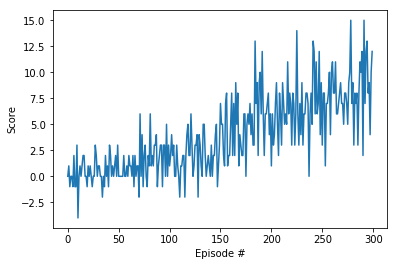


#################
ANALYSING RESULTS FOR: 1609525059_Xavier Uniform.pickle
#################

FINAL SCORE: 7.54



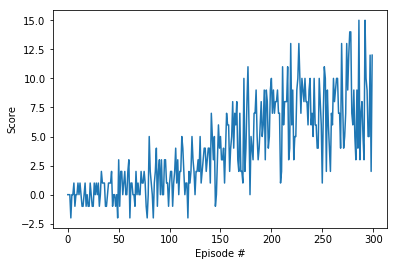


#################
ANALYSING RESULTS FOR: 1609523094_Epsion Decay 999.pickle
#################

FINAL SCORE: 1.11



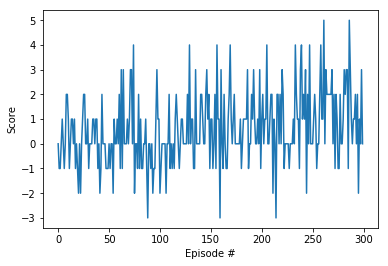


#################
ANALYSING RESULTS FOR: 1609524281_Simpler Model 64.pickle
#################

FINAL SCORE: 5.51



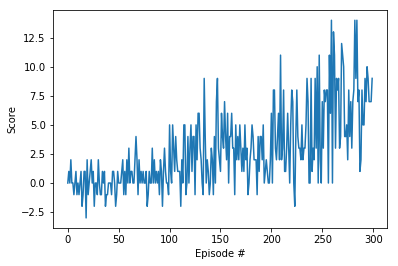


#################
ANALYSING RESULTS FOR: 1609523891_Batch Normalisation.pickle
#################

FINAL SCORE: 7.8



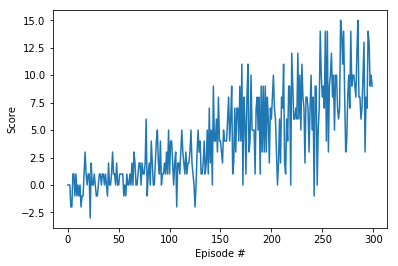


#################
ANALYSING RESULTS FOR: 1609524679_Complex Model 3 Layer.pickle
#################

FINAL SCORE: 6.1



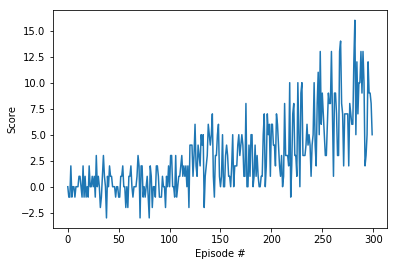


#################
ANALYSING RESULTS FOR: 1609522706_Learning Rate 0001.pickle
#################

FINAL SCORE: 7.97



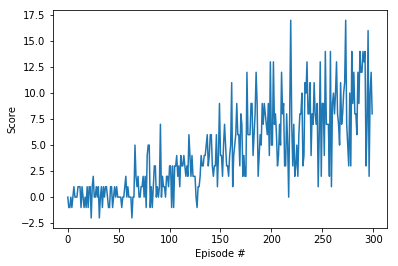


#################
ANALYSING RESULTS FOR: 1609523470_Tau 01.pickle
#################

FINAL SCORE: 8.31



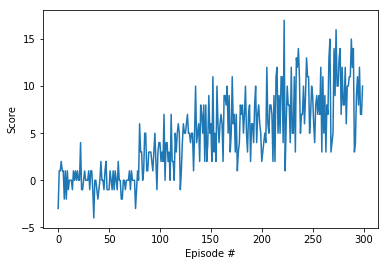

In [15]:
for file in result_files:
    print("\n#################\nANALYSING RESULTS FOR: {}\n#################".format(file))
    
    file_location = os.path.join('results', file)
    
    with open(file_location, 'rb') as handle:
        saved_results = pickle.load(handle)
        
    print("\nFINAL SCORE: {}\n".format(saved_results['final_score']))
    
    scores = saved_results['all_scores']
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()